---------------------------------------------------------------------------------------------------------------------------------
## Importing the Dataset




In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
diabetesData = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
diabetesData.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

Observations made from a quick glance:
* There are `21` variables and `70692` samples in the dataset.
* All the variables are identified as `float64`, even though there exists `boolean` type data (Diabetes_binary, PhysActivity etc.)
* None of the variables seem to have any missing value.

In [4]:
diabetesData.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

It is confirmed that none of the variables have missing values.

In [5]:
diabetesData.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


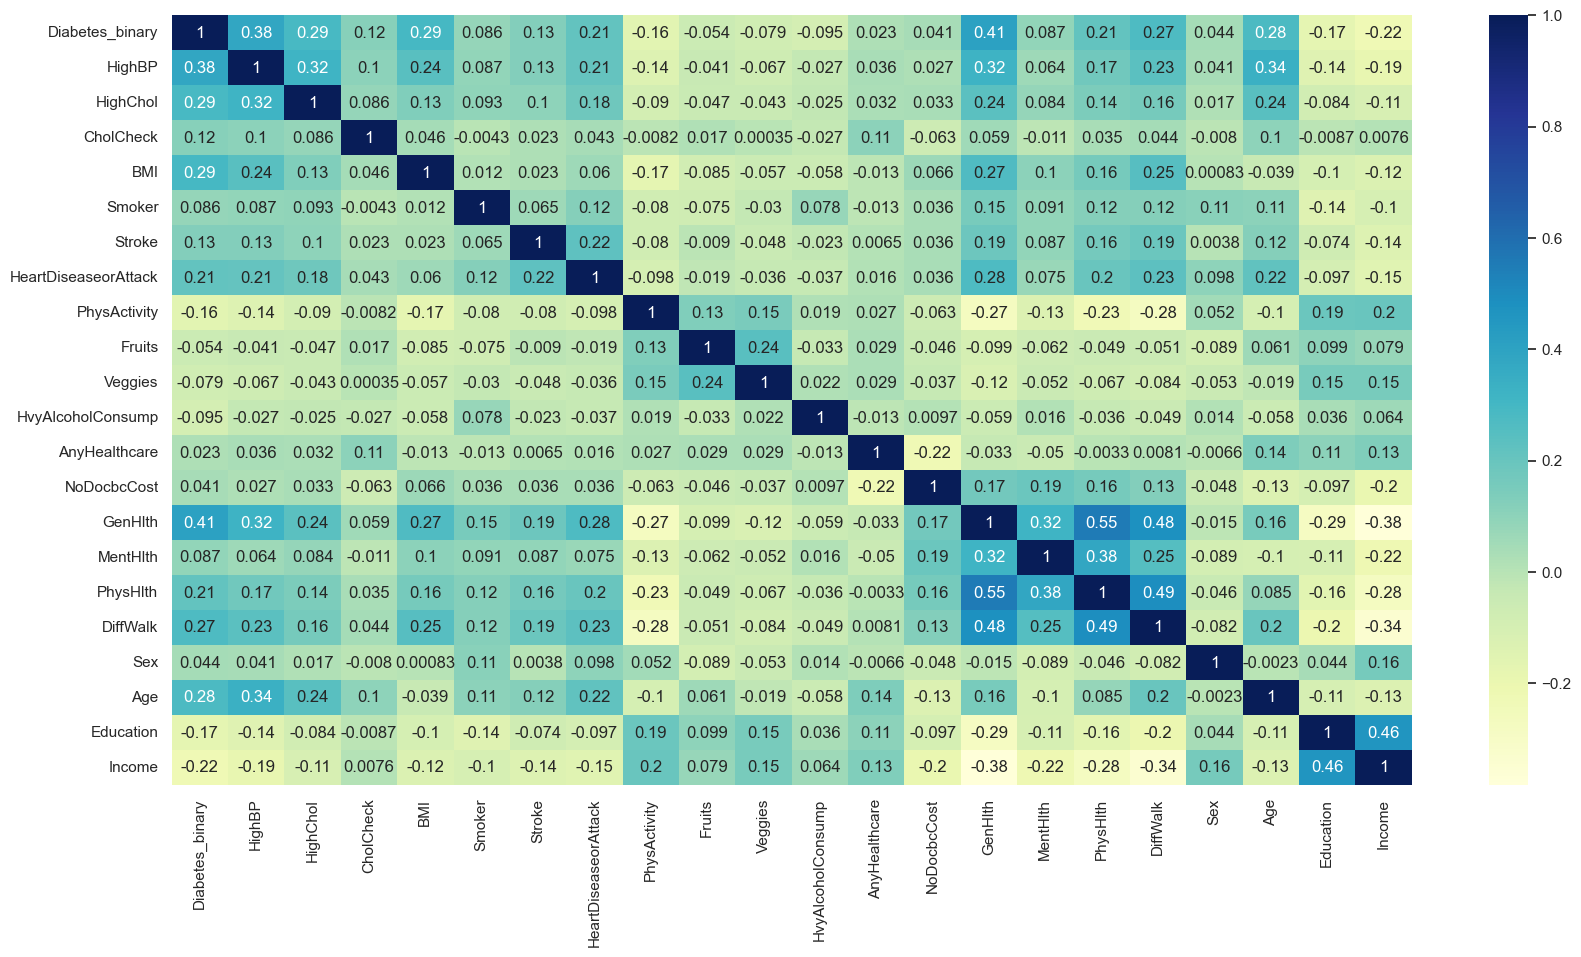

In [6]:
plt.figure(figsize=(20,10))
sb.heatmap(diabetesData.corr(), annot=True, cmap="YlGnBu")
plt.show()

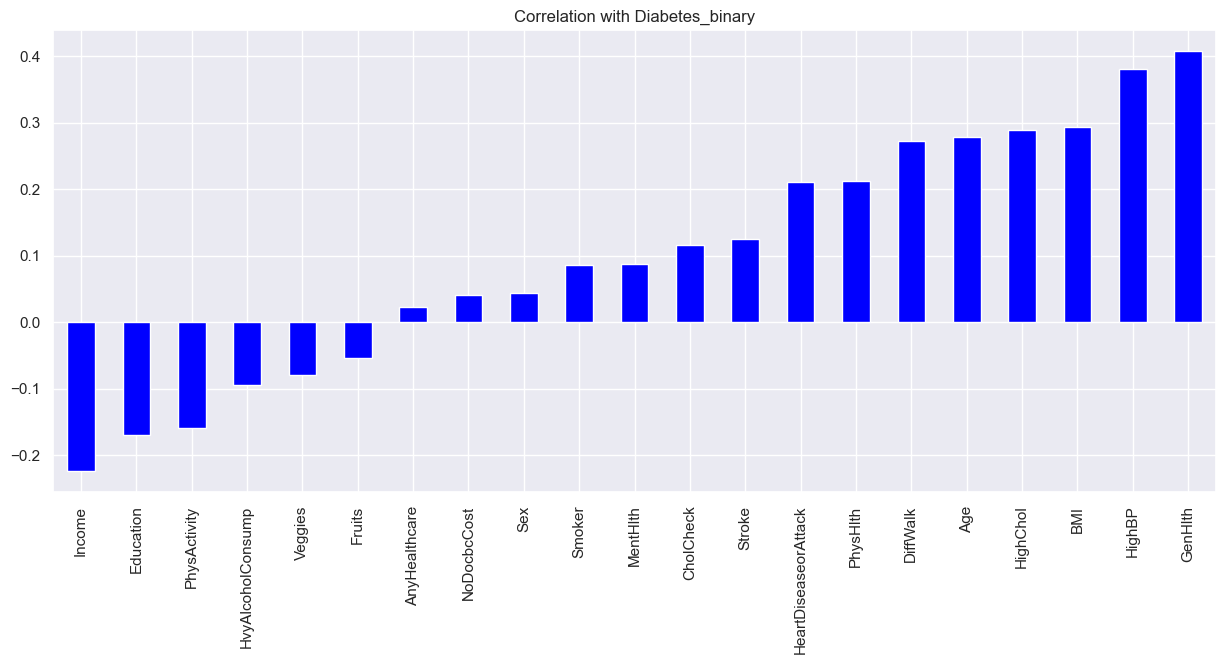

In [7]:
diabetesData.drop('Diabetes_binary', axis=1).corrwith(diabetesData.Diabetes_binary).sort_values().plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

Significant Risk Factors (correlation coefficient > |0.2|)
- GenHealth (most significant)
- HighBP
- BMI
- HighChol
- Age
- Income
- DiffWalk 
- PhysHealth 

In [8]:
numeric_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'BMI', 'PhysHlth']])
binary_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'HighBP', 'HighChol','DiffWalk']])
oneHot_data = pd.DataFrame(diabetesData[['Diabetes_binary', 'GenHlth', 'Age', 'Income']])

In [9]:
binary_data.replace([1.0 ,0.0], [True, False], inplace = True)


In [10]:
binary_data.head()

,Diabetes_binary,HighBP,HighChol,DiffWalk
0,False,True,False,False
1,False,True,True,False
2,False,False,False,False
3,False,True,True,False
4,False,False,False,False


categorical data
1. one hot encoding - explain the encoding and do correlation
2. binary

---------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis - Numerical Data

dataframe with numeric data

#transform data
df.Diabetes_binary[df['Diabetes_binary'] == 0.0] = 'No Diabetes'
df.Diabetes_binary[df['Diabetes_binary'] == 1.0] = 'Pre Diabetes/Diabetes'

df.HighBP[df['HighBP'] == 0] = 'No High'
df.HighBP[df['HighBP'] == 1] = 'High BP'

df.HighChol[df['HighChol'] == 0] = 'No High Cholesterol'
df.HighChol[df['HighChol'] == 1] = 'High Cholesterol'

df.CholCheck[df['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df.CholCheck[df['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df.Smoker[df['Smoker'] == 0] = 'No'
df.Smoker[df['Smoker'] == 1] = 'Yes'

df.Stroke[df['Stroke'] == 0] = 'No'
df.Stroke[df['Stroke'] == 1] = 'Yes'

df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 0] = 'No'
df.HeartDiseaseorAttack[df['HeartDiseaseorAttack'] == 1] = 'Yes'

df.PhysActivity[df['PhysActivity'] == 0] = 'No'
df.PhysActivity[df['PhysActivity'] == 1] = 'Yes'

df.Fruits[df['Fruits'] == 0] = 'No'
df.Fruits[df['Fruits'] == 1] = 'Yes'

df.Veggies[df['Veggies'] == 0] = 'No'
df.Veggies[df['Veggies'] == 1] = 'Yes'

df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 0] = 'No'
df.HvyAlcoholConsump[df['HvyAlcoholConsump'] == 1] = 'Yes'

df.AnyHealthcare[df['AnyHealthcare'] == 0] = 'No'
df.AnyHealthcare[df['AnyHealthcare'] == 1] = 'Yes'

df.NoDocbcCost[df['NoDocbcCost'] == 0] = 'No'
df.NoDocbcCost[df['NoDocbcCost'] == 1] = 'Yes'

df.GenHlth[df['GenHlth'] == 1] = 'Excellent'
df.GenHlth[df['GenHlth'] == 2] = 'Very Good'
df.GenHlth[df['GenHlth'] == 3] = 'Good'
df.GenHlth[df['GenHlth'] == 4] = 'Fair'
df.GenHlth[df['GenHlth'] == 5] = 'Poor'

df.DiffWalk[df['DiffWalk'] == 0] = 'No'
df.DiffWalk[df['DiffWalk'] == 1] = 'Yes'

df.Sex[df['Sex'] == 0] = 'Female'
df.Sex[df['Sex'] == 1] = 'Male'

df.Education[df['Education'] == 1] = 'Never Attended School/Kindergarten'
df.Education[df['Education'] == 2] = 'Elementary'
df.Education[df['Education'] == 3] = 'Some high school'
df.Education[df['Education'] == 4] = 'High school graduate'
df.Education[df['Education'] == 5] = 'Some college or technical school'
df.Education[df['Education'] == 6] = 'College graduate'

df.Income[df['Income'] == 1] = '$10,000 or less'
df.Income[df['Income'] == 2] = '$10,000 - $15,000'
df.Income[df['Income'] == 3] = '$15,000 - $20,000'
df.Income[df['Income'] == 4] = '$20,000 - $25,000'
df.Income[df['Income'] == 5] = '$25,000 - $35,000'
df.Income[df['Income'] == 6] = '$35,000 - $50,000'
df.Income[df['Income'] == 7] = '$50,000 - $75,000'
df.Income[df['Income'] == 8] = '$75,000 or more'

should use k fold cross validation instead of train test split as the model will perform k number of times with random sets

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split ##can use kfold cross validation
from sklearn.metrics import confusion_matrix

In [12]:
import random 
random.seed(10)

In [13]:
BMI = pd.DataFrame(numeric_data['BMI'])
diabetes = pd.DataFrame(numeric_data['Diabetes_binary'])

BMI_train, BMI_test, diabetes_train, diabetes_test = train_test_split(BMI, diabetes, test_size = 0.25)
print("DATA SET: [BMI, diabetes binary]")
print("Train Set :", BMI_train.shape, diabetes_train.shape)
print("Test Set  :", BMI_test.shape, diabetes_test.shape)

BMI_train_DF = pd.concat([BMI_train,diabetes_train], axis = 1).reindex(diabetes_train.index)

DATA SET: [BMI, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


<Axes: xlabel='BMI', ylabel='Diabetes_binary'>

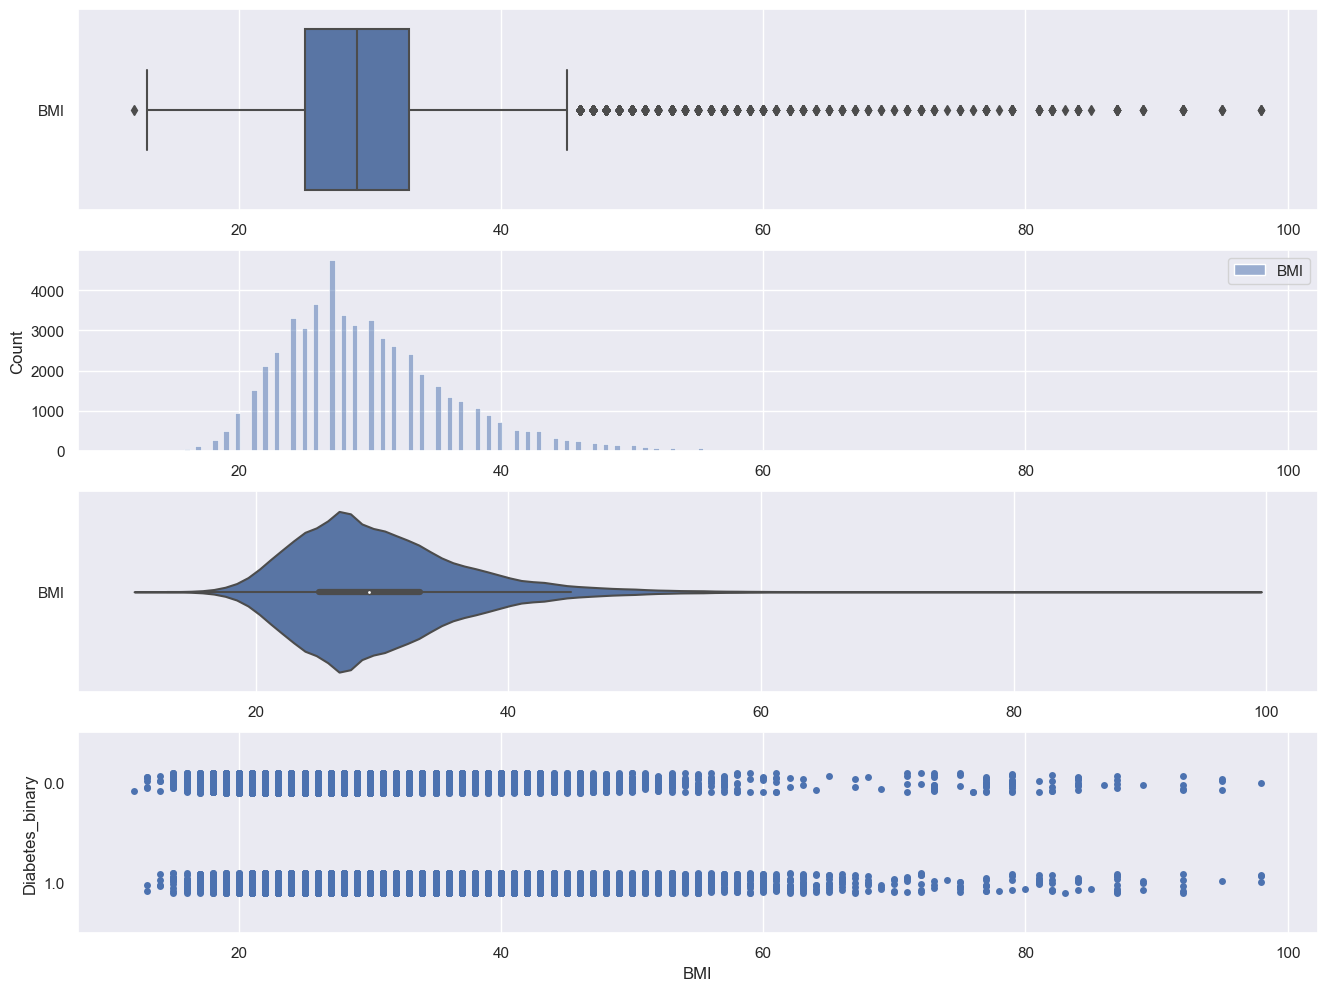

In [14]:

f, axes = plt.subplots(4, 1, figsize=(16, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = BMI_train, orient = "h", ax = axes[0])
sb.histplot(data = BMI_train, ax = axes[1])
sb.violinplot(data = BMI_train, orient = "h", ax = axes[2])

#gives error when x is BMI and y is diabetes
sb.stripplot(x = numeric_data['BMI'], y = numeric_data['Diabetes_binary'], data = BMI_train_DF, orient = "h", ax = axes[3])


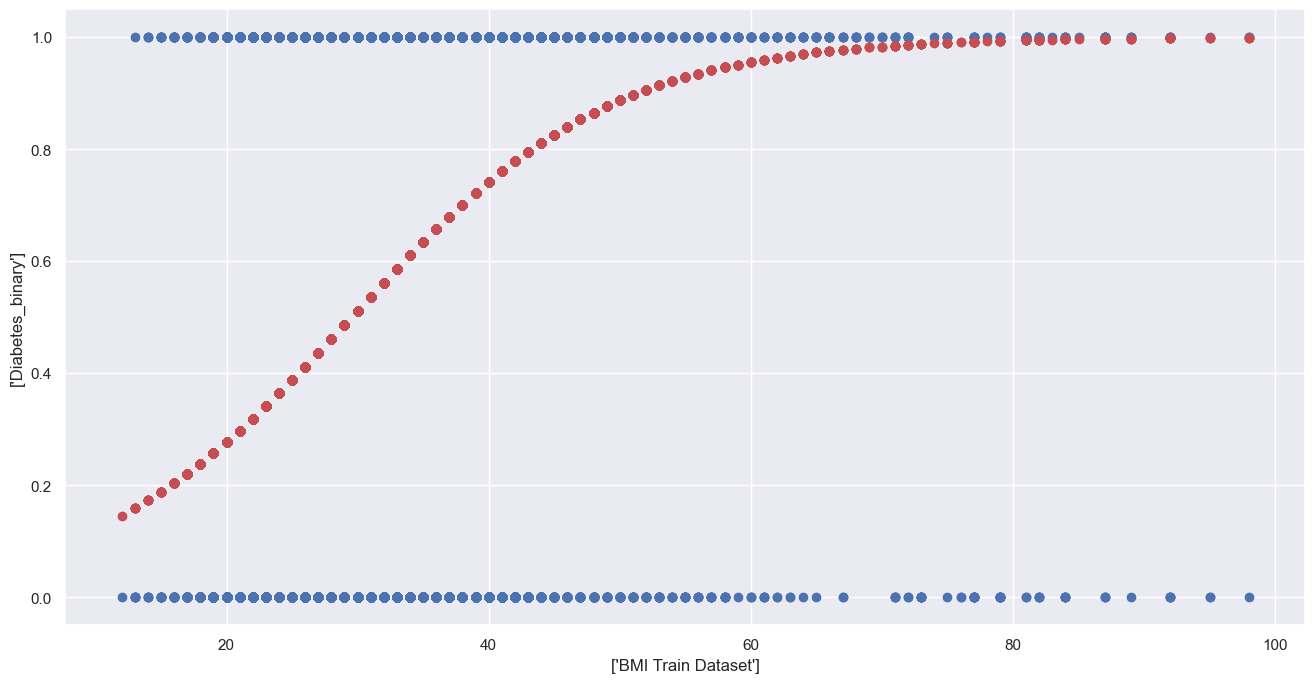

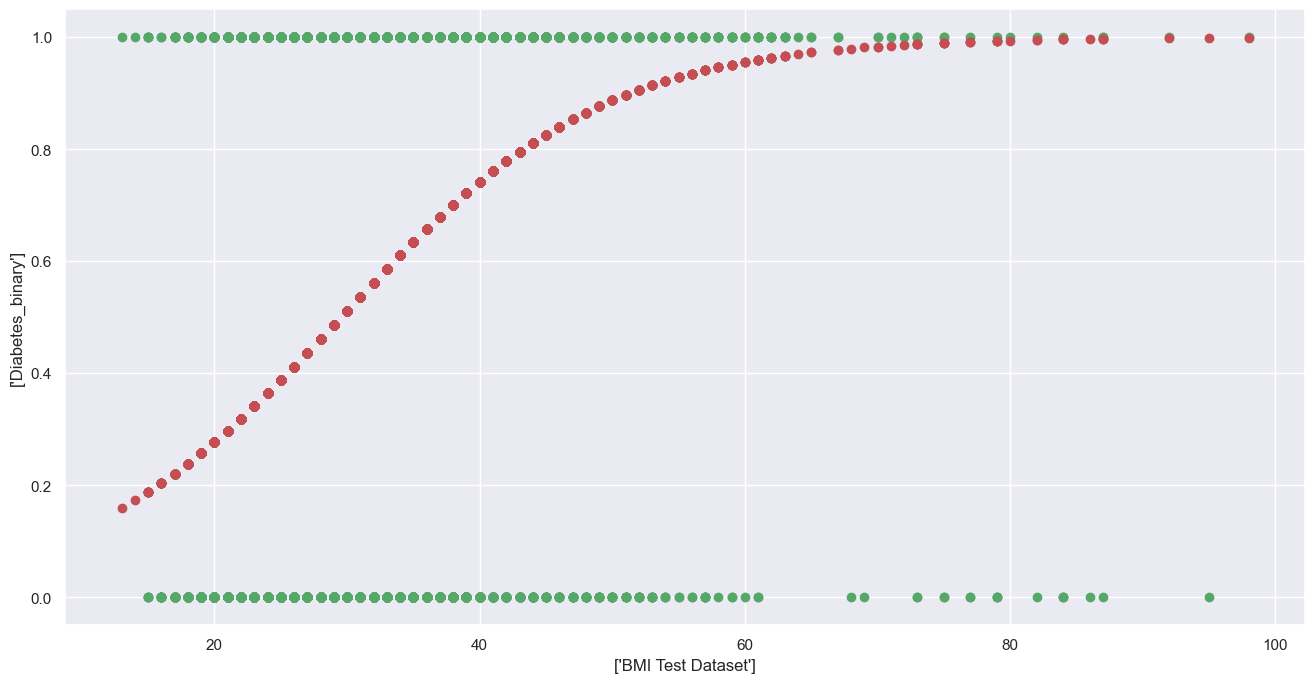

In [15]:
#Performing the Logistic Regression
from sklearn.linear_model import LogisticRegression

#instantiating the model
logreg = LogisticRegression()
logreg.fit(BMI_train, np.ravel(diabetes_train.astype(int)))

diabetes_train_pred = logreg.predict(BMI_train)
diabetes_test_pred = logreg.predict(BMI_test)
'''
sorted_indices = np.argsort(BMI_train[:,0])
sorted_BMI_train = np.take_along_axis(BMI_train, sorted_indices, axis = 0).flatten()
sorted_diabetes_train_pred = diabetes_train_pred[sorted_indices].reshape(-1,1)
plt.scatter(BMI_train, diabetes_train, color = 'b')
plt.plot(sorted_BMI_train, logreg.predict_proba(np.array(sorted_BMI_train).reshape(-1,1))[:,1], color = 'r')
'''
#Plot the Regression Line for both train and test dataset
f = plt.figure(figsize = (16,8))
plt.scatter(BMI_train,diabetes_train)
plt.scatter(BMI_train,logreg.predict_proba(BMI_train)[:,1],color = 'r')
plt.xlabel(BMI_train.columns.values + " Train Dataset")
plt.ylabel(diabetes_train.columns.values)

f = plt.figure(figsize = (16,8))
plt.scatter(BMI_test, diabetes_test, color = 'g')
plt.scatter(BMI_test, logreg.predict_proba(BMI_test)[:,1],color = 'r')
plt.xlabel(BMI.columns.values + " Test Dataset")
plt.ylabel(diabetes.columns.values)

plt.show()


True Postive Rate: 		 0.5822956246943305
False Positive Rate: 		 0.34614734707671513

True Postive Rate: 		 0.5794637763833428
False Positive Rate: 		 0.34650025733401957



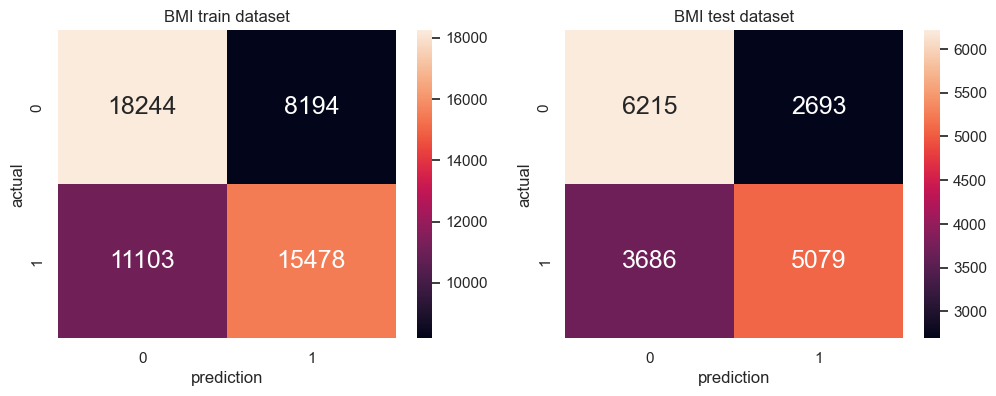

In [16]:
from sklearn.metrics import confusion_matrix

#Calculating FP and TP values
train_matrix = confusion_matrix(diabetes_train, diabetes_train_pred)
FP_train = train_matrix[0][1]
TP_train = train_matrix[1][1]
FN_train = train_matrix[1][0]
TN_train = train_matrix[1][1]
print("True Postive Rate: \t\t", TP_train/(FN_train + TP_train))
print("False Positive Rate: \t\t", FP_train/(FP_train + TN_train))
print()
test_matrix = confusion_matrix(diabetes_test,diabetes_test_pred)
FP_test = test_matrix[0][1]
TP_test = test_matrix[1][1]
FN_test = test_matrix[1][0]
TN_test = test_matrix[1][1]
print("True Postive Rate: \t\t", TP_test/(FN_test + TP_test))
print("False Positive Rate: \t\t", FP_test/(FP_test + TN_test))
print()
f, axes = plt.subplots(1, 2, figsize = (12,4))
sb.heatmap(train_matrix,
          annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[0])
axes[0].set_title('BMI train dataset')
axes[0].set_xlabel('prediction')
axes[0].set_ylabel('actual')
sb.heatmap(test_matrix,
          annot = True, fmt = ".0f", annot_kws = {"size" : 18}, ax = axes[1])
axes[1].set_title('BMI test dataset')
axes[1].set_xlabel('prediction')
axes[1].set_ylabel('actual')

plt.show()

In [17]:
from sklearn.metrics import classification_report
target_names = ['no diabetes', 'have diabetes']
print(classification_report(diabetes_test,diabetes_test_pred, target_names = target_names))

               precision    recall  f1-score   support

  no diabetes       0.63      0.70      0.66      8908
have diabetes       0.65      0.58      0.61      8765

     accuracy                           0.64     17673
    macro avg       0.64      0.64      0.64     17673
 weighted avg       0.64      0.64      0.64     17673



precision: when predicted, how much % will patients have it   
recall: able to identify patients with diabetes 62% of the time

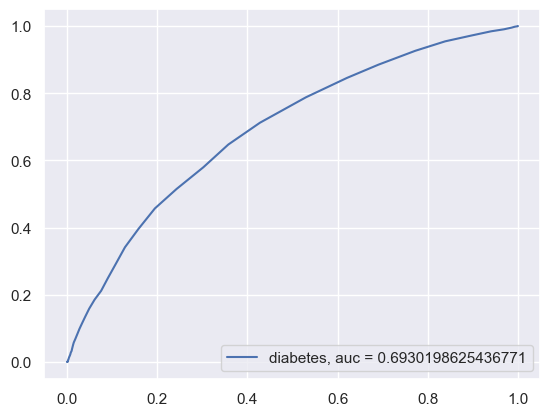

In [18]:
from sklearn import metrics
diabetes_pred_proba = logreg.predict_proba(BMI_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(diabetes_test, diabetes_pred_proba)
auc = metrics.roc_auc_score(diabetes_test, diabetes_pred_proba)

plt.plot(fpr,tpr,label = "diabetes, auc = " + str(auc))
plt.legend(loc=4)
plt.show()

AUC 1 is perfect and 0.5 is dogshit   
ROC curve is a plot of the TP rate against the FP rate

In [19]:
#create dataframe
#use skew function
import math
PhysHlth= pd.DataFrame(numeric_data['PhysHlth'])
PhysHlth_log = np.log(PhysHlth + 1)

PhysHlth_train, PhysHlth_test, diabetes_train, diabetes_test = train_test_split(PhysHlth_log, diabetes, test_size = 0.25)
print("DATA SET: [PhysHlth, diabetes binary]")
print("Train Set :", PhysHlth_train.shape, diabetes_train.shape)
print("Test Set  :", PhysHlth_test.shape, diabetes_test.shape)

PhysHlth_train_DF = pd.concat([PhysHlth_train,diabetes_train], axis = 1).reindex(diabetes_train.index)

DATA SET: [PhysHlth, diabetes binary]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


<Axes: xlabel='PhysHlth', ylabel='Diabetes_binary'>

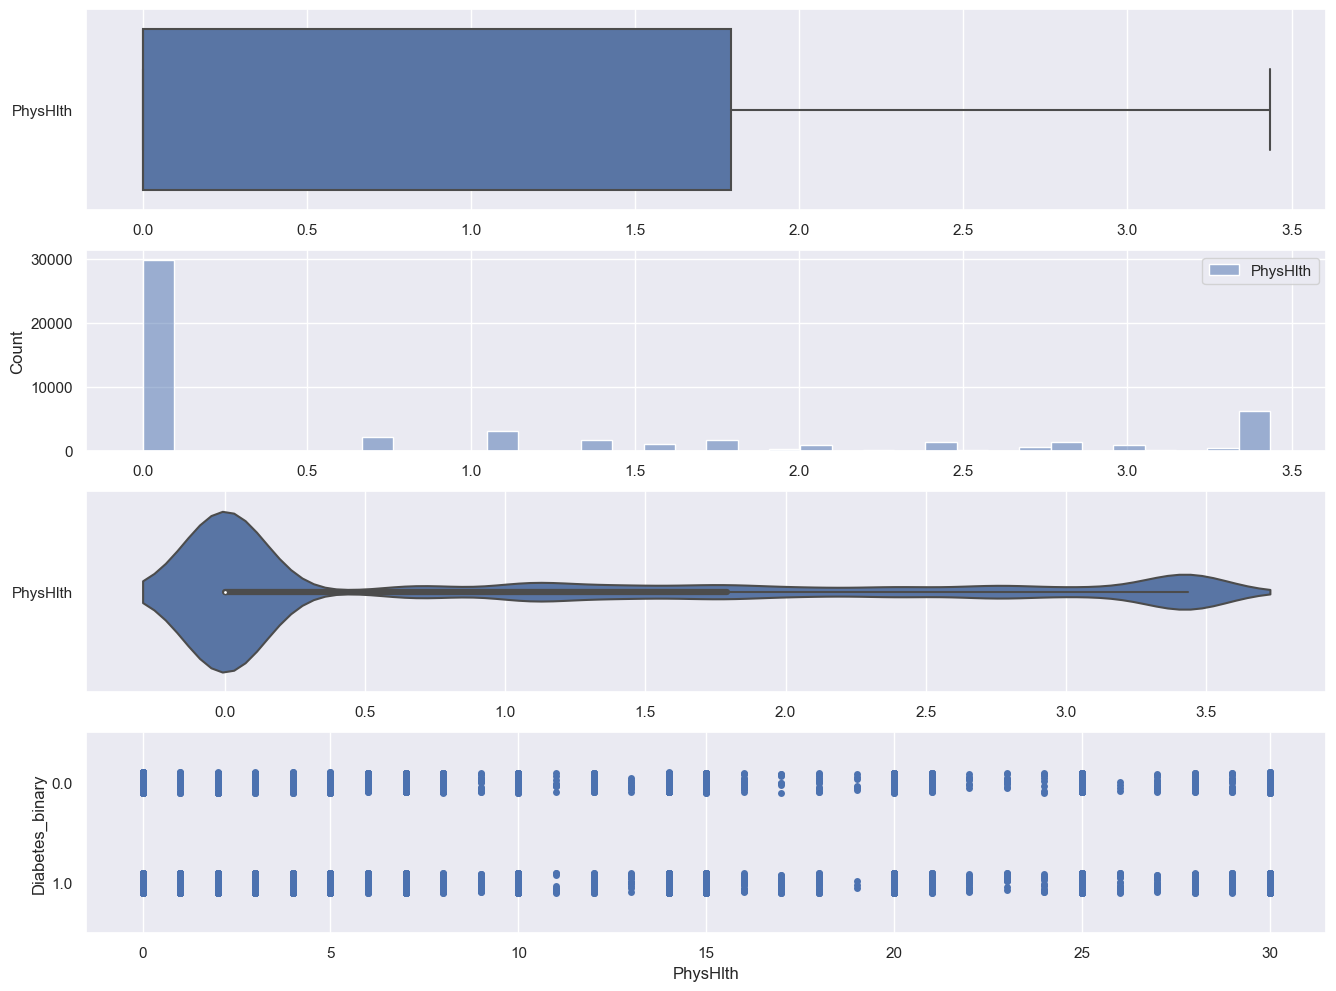

In [20]:
f, axes = plt.subplots(4, 1, figsize=(16, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = PhysHlth_train, orient = "h", ax = axes[0])
sb.histplot(data = PhysHlth_train, ax = axes[1])
sb.violinplot(data = PhysHlth_train, orient = "h", ax = axes[2])
sb.stripplot(x = numeric_data['PhysHlth'], y = numeric_data['Diabetes_binary'], data = PhysHlth_train_DF, orient = "h", ax = axes[3])


[Text(0.5, 0.9, 'BMI <= 39.5\ngini = 0.5\nsamples = 53019\nvalue = [26439, 26580]\nclass = diabetes'),
 Text(0.25, 0.7, 'BMI <= 16.5\ngini = 0.5\nsamples = 48519\nvalue = [24249, 24270]\nclass = diabetes'),
 Text(0.125, 0.5, 'BMI <= 14.5\ngini = 0.483\nsamples = 88\nvalue = [36, 52]\nclass = diabetes'),
 Text(0.0625, 0.3, 'BMI <= 12.5\ngini = 0.48\nsamples = 15\nvalue = [9, 6]\nclass = no diabetes'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = diabetes'),
 Text(0.09375, 0.1, 'gini = 0.459\nsamples = 14\nvalue = [9, 5]\nclass = no diabetes'),
 Text(0.1875, 0.3, 'BMI <= 15.5\ngini = 0.466\nsamples = 73\nvalue = [27, 46]\nclass = diabetes'),
 Text(0.15625, 0.1, 'gini = 0.444\nsamples = 21\nvalue = [7, 14]\nclass = diabetes'),
 Text(0.21875, 0.1, 'gini = 0.473\nsamples = 52\nvalue = [20, 32]\nclass = diabetes'),
 Text(0.375, 0.5, 'BMI <= 25.5\ngini = 0.5\nsamples = 48431\nvalue = [24213, 24218]\nclass = diabetes'),
 Text(0.3125, 0.3, 'BMI <= 21.5\ngini = 0.5\nsamp

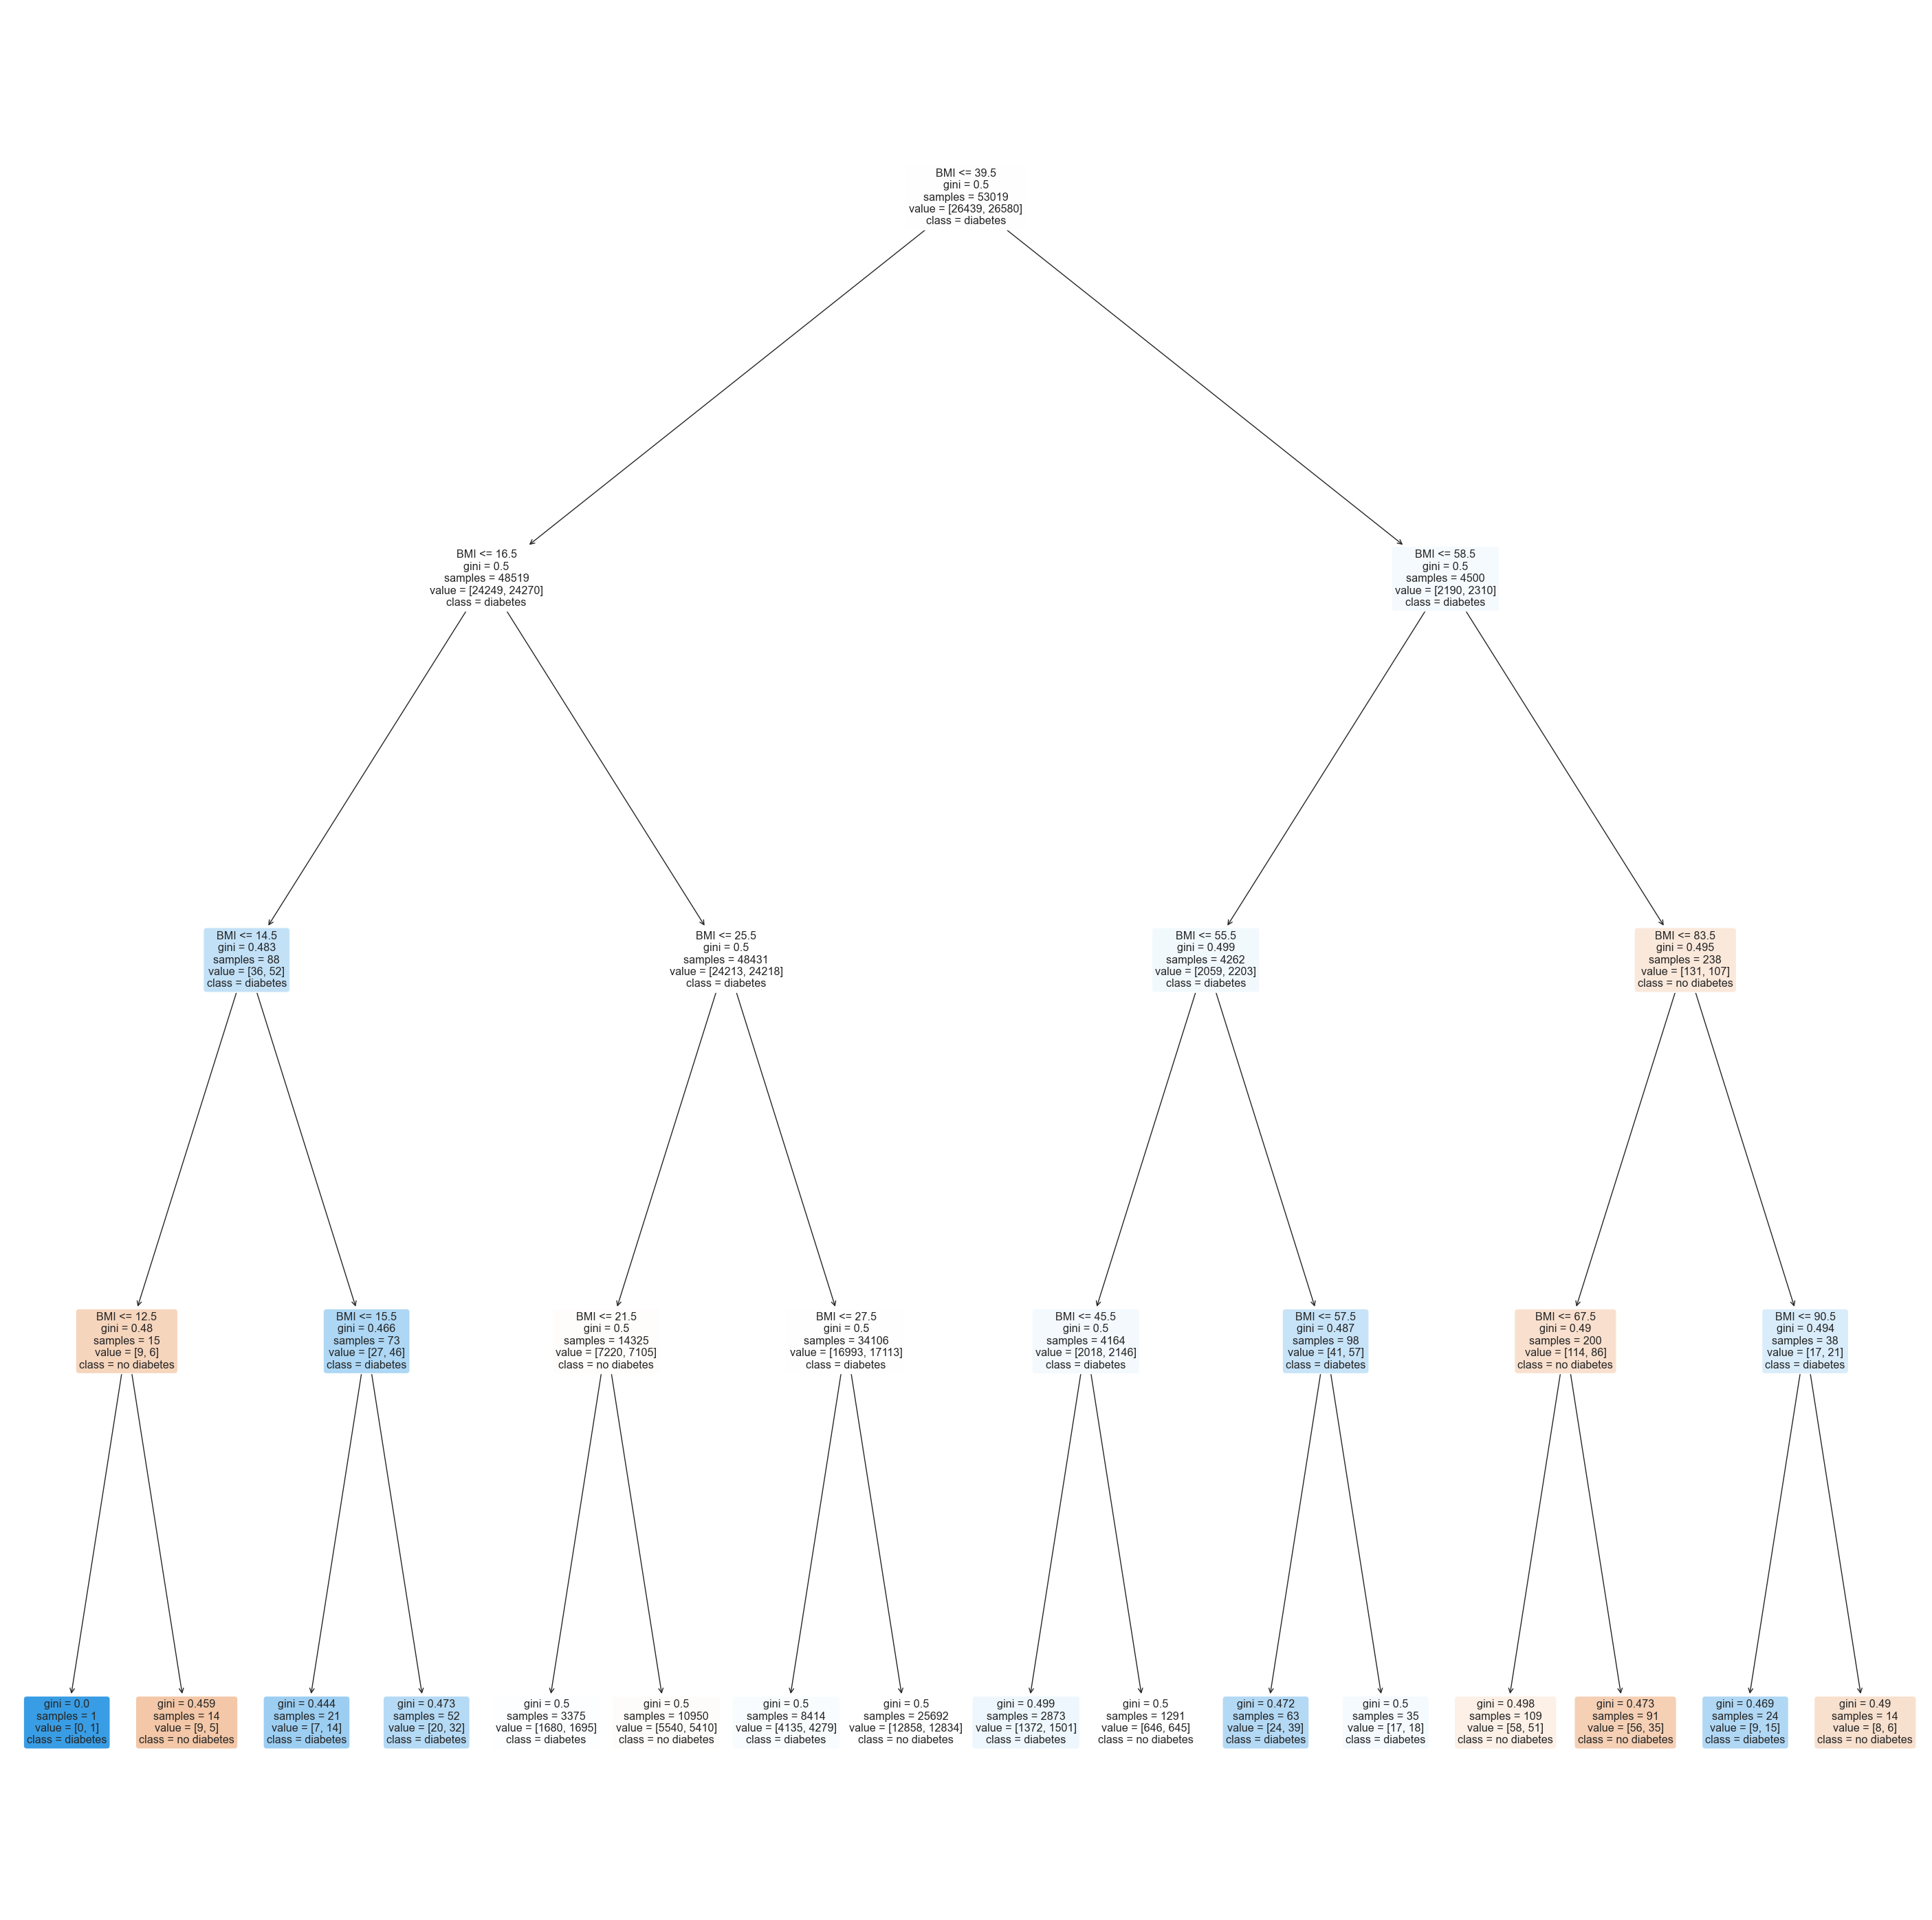

In [21]:
# BMI DEC TREE 
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
dectree.fit(BMI_train, diabetes_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["BMI"], 
          class_names=["no diabetes","diabetes"])

[Text(0.39285714285714285, 0.9166666666666666, 'PhysHlth <= 1.498\ngini = 0.5\nsamples = 53019\nvalue = [26439, 26580]\nclass = diabetes'),
 Text(0.14285714285714285, 0.75, 'PhysHlth <= 0.896\ngini = 0.491\nsamples = 36981\nvalue = [20990, 15991]\nclass = no diabetes'),
 Text(0.07142857142857142, 0.5833333333333334, 'PhysHlth <= 0.347\ngini = 0.488\nsamples = 32055\nvalue = [18548, 13507]\nclass = no diabetes'),
 Text(0.03571428571428571, 0.4166666666666667, 'gini = 0.488\nsamples = 29881\nvalue = [17268, 12613]\nclass = no diabetes'),
 Text(0.10714285714285714, 0.4166666666666667, 'gini = 0.484\nsamples = 2174\nvalue = [1280, 894]\nclass = no diabetes'),
 Text(0.21428571428571427, 0.5833333333333334, 'PhysHlth <= 1.242\ngini = 0.5\nsamples = 4926\nvalue = [2442, 2484]\nclass = diabetes'),
 Text(0.17857142857142858, 0.4166666666666667, 'gini = 0.5\nsamples = 3127\nvalue = [1601, 1526]\nclass = no diabetes'),
 Text(0.25, 0.4166666666666667, 'gini = 0.498\nsamples = 1799\nvalue = [841, 9

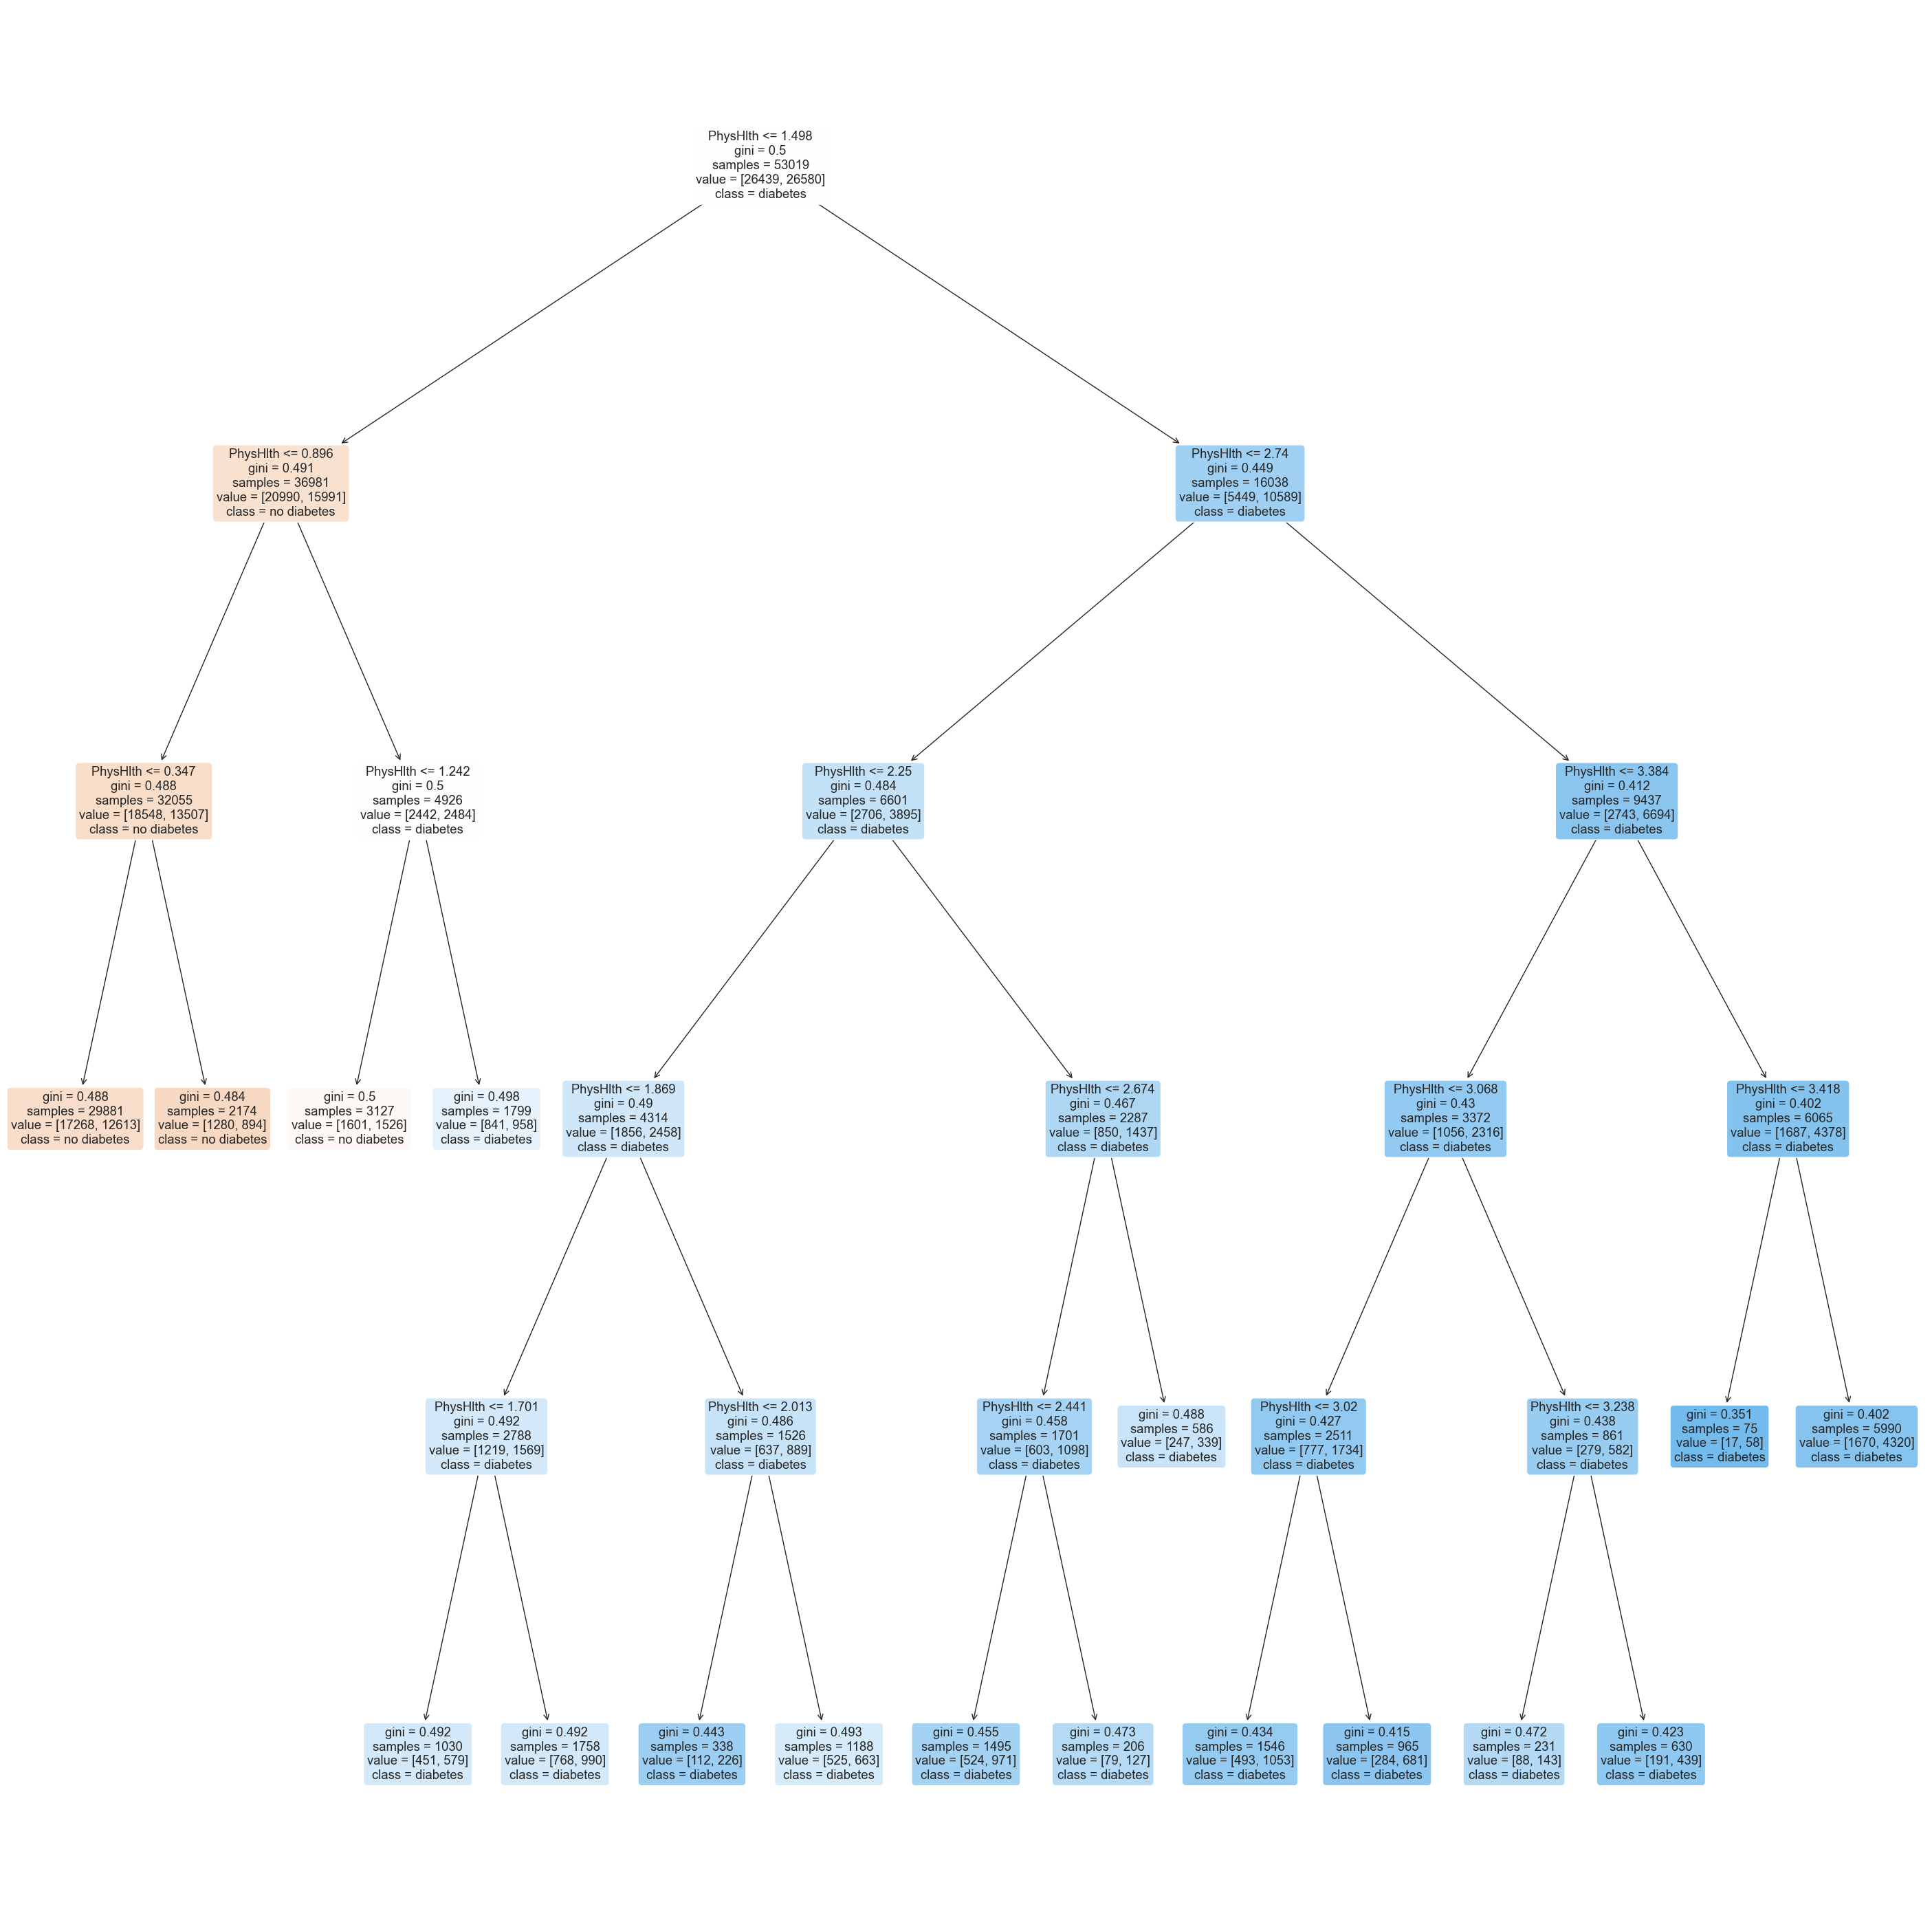

In [22]:
# PHYSHLTH DEC TREE
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 5)

# Train the Decision Tree Classifier model
dectree.fit(PhysHlth_train, diabetes_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["PhysHlth"], 
          class_names=["no diabetes","diabetes"])

numerical Data - use logistic regression for numerical to binary and use correlation matrix to evaluate the values

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
'''
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
'''
reg  = MLPRegressor(random_state=1, max_iter=500).fit(PhysHlth_train, np.ravel(diabetes_train.astype(int)))
reg.predict(PhysHlth_train[:1])
reg.score(PhysHlth_train, diabetes_train)

0.046670464504415365

In [24]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=500).fit(PhysHlth_train, np.ravel(diabetes_train.astype(int)))
clf.predict(PhysHlth_train[:1])
clf.score(PhysHlth_train, diabetes_train)

0.5978234217921877

---------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis - Binary Data

In [25]:
#use support vector machine 

In [26]:
highBP = pd.DataFrame(binary_data['HighBP'])
diabetes_2 = pd.DataFrame(binary_data['Diabetes_binary'])

highBP_train, highBP_test, diabetes_2_train, diabetes_2_test = train_test_split(highBP, diabetes_2, test_size = 0.25)
print("DATA SET: [highBP, diabetes binary 2]")
print("Train Set :", highBP_train.shape, diabetes_2_train.shape)
print("Test Set  :", highBP_test.shape, diabetes_2_test.shape)

highBP_train_DF = pd.concat([highBP_train,diabetes_2_train], axis = 1).reindex(diabetes_2_train.index)

DATA SET: [highBP, diabetes binary 2]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


In [27]:
#importing the SVM model
from sklearn import svm

#create SVM Classifier - Linear Kernel
clf = svm.SVC(kernel = 'linear')

#Train the model using the train set
clf.fit(highBP_train, np.ravel(diabetes_2_train.astype(int)))

#predict the response for train set
diabetes_2_train_pred = clf.predict(highBP_train)

In [28]:
#accuracy calculation
print("Accuracy: ", metrics.accuracy_score(diabetes_2_train,diabetes_2_train_pred))

target_names = ['no diabetes', 'have diabetes']
print(classification_report(diabetes_2_train,diabetes_2_train_pred, target_names = target_names))

Accuracy:  0.6892812010788585
               precision    recall  f1-score   support

  no diabetes       0.72      0.63      0.67     26569
have diabetes       0.67      0.75      0.71     26450

     accuracy                           0.69     53019
    macro avg       0.69      0.69      0.69     53019
 weighted avg       0.69      0.69      0.69     53019



In [29]:
#predict on test set
diabetes_2_test_pred = clf.predict(highBP_test)
#accuracy calculation
print("Accuracy: ", metrics.accuracy_score(diabetes_2_test,diabetes_2_test_pred))

target_names = ['no diabetes', 'have diabetes']
print(classification_report(diabetes_2_test,diabetes_2_test_pred, target_names = target_names))

Accuracy:  0.6890171447971482
               precision    recall  f1-score   support

  no diabetes       0.71      0.63      0.67      8777
have diabetes       0.67      0.75      0.71      8896

     accuracy                           0.69     17673
    macro avg       0.69      0.69      0.69     17673
 weighted avg       0.69      0.69      0.69     17673



i think can try use SVM for this but we should change the parameters to get better accuracy and stats

non binary converted

In [30]:
highBP = pd.DataFrame(diabetesData['HighBP'])
diabetes_2 = pd.DataFrame(diabetesData['Diabetes_binary'])

highBP_train, highBP_test, diabetes_2_train, diabetes_2_test = train_test_split(highBP, diabetes_2, test_size = 0.25)
print("DATA SET: [highBP, diabetes binary 2]")
print("Train Set :", highBP_train.shape, diabetes_2_train.shape)
print("Test Set  :", highBP_test.shape, diabetes_2_test.shape)

highBP_train_DF = pd.concat([highBP_train,diabetes_2_train], axis = 1).reindex(diabetes_2_train.index)

DATA SET: [highBP, diabetes binary 2]
Train Set : (53019, 1) (53019, 1)
Test Set  : (17673, 1) (17673, 1)


In [31]:
#importing the SVM model
from sklearn import svm

#create SVM Classifier - Linear Kernel
clf = svm.SVC(kernel = 'linear')

#Train the model using the train set
clf.fit(highBP_train, np.ravel(diabetes_2_train.astype(int)))

#predict the response for train set
diabetes_2_train_pred = clf.predict(highBP_train)

In [32]:
#accuracy calculation
print("Accuracy: ", metrics.accuracy_score(diabetes_2_train,diabetes_2_train_pred))

target_names = ['no diabetes', 'have diabetes']
print(classification_report(diabetes_2_train,diabetes_2_train_pred, target_names = target_names))

Accuracy:  0.6915445406363756
               precision    recall  f1-score   support

  no diabetes       0.72      0.63      0.67     26496
have diabetes       0.67      0.76      0.71     26523

     accuracy                           0.69     53019
    macro avg       0.69      0.69      0.69     53019
 weighted avg       0.69      0.69      0.69     53019



In [33]:
#predict on test set
diabetes_2_test_pred = clf.predict(highBP_test)
#accuracy calculation
print("Accuracy: ", metrics.accuracy_score(diabetes_2_test,diabetes_2_test_pred))

target_names = ['no diabetes', 'have diabetes']
print(classification_report(diabetes_2_test,diabetes_2_test_pred, target_names = target_names))

Accuracy:  0.6822271261245968
               precision    recall  f1-score   support

  no diabetes       0.71      0.62      0.66      8850
have diabetes       0.66      0.74      0.70      8823

     accuracy                           0.68     17673
    macro avg       0.68      0.68      0.68     17673
 weighted avg       0.69      0.68      0.68     17673



---------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis - OneHot Data

In [72]:
age = pd.DataFrame(oneHot_data[['Age', 'Diabetes_binary']])


In [73]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              70692 non-null  float64
 1   Diabetes_binary  70692 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


C:\Users\wongk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wongk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wongk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wongk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

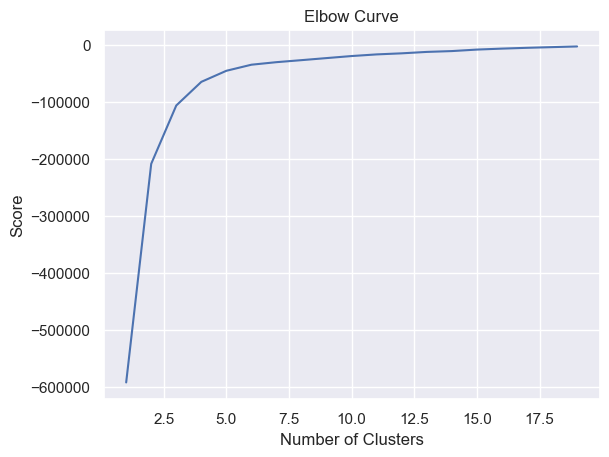

In [74]:
from sklearn.cluster import KMeans

Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(age).score(age) for i in range(len(kmeans))]
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [75]:
kmeans = KMeans(n_clusters=13, random_state=0).fit(age)
age['cluster']=kmeans.labels_

C:\Users\wongk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [76]:
age.loc[age.cluster == 0].count

<bound method DataFrame.count of        Age  Diabetes_binary  cluster
4      8.0              0.0        0
18     8.0              0.0        0
22     8.0              0.0        0
25     8.0              0.0        0
40     8.0              0.0        0
...    ...              ...      ...
35278  8.0              0.0        0
35305  8.0              0.0        0
35309  8.0              0.0        0
35317  8.0              0.0        0
35323  8.0              0.0        0

[4340 rows x 3 columns]>

In [77]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              70692 non-null  float64
 1   Diabetes_binary  70692 non-null  float64
 2   cluster          70692 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 1.3 MB


In [78]:
age['Diabetes_binary'].replace([1.0 ,0.0], ["True", "False"], inplace = True)

In [81]:
age

,Age,Diabetes_binary,cluster
0,4.0,False,2
1,12.0,False,1
2,13.0,False,9
3,11.0,False,5
4,8.0,False,0
...,...,...,...
70687,6.0,True,10
70688,10.0,True,4
70689,13.0,True,9
70690,11.0,True,5


<Axes: xlabel='cluster', ylabel='Diabetes_binary'>

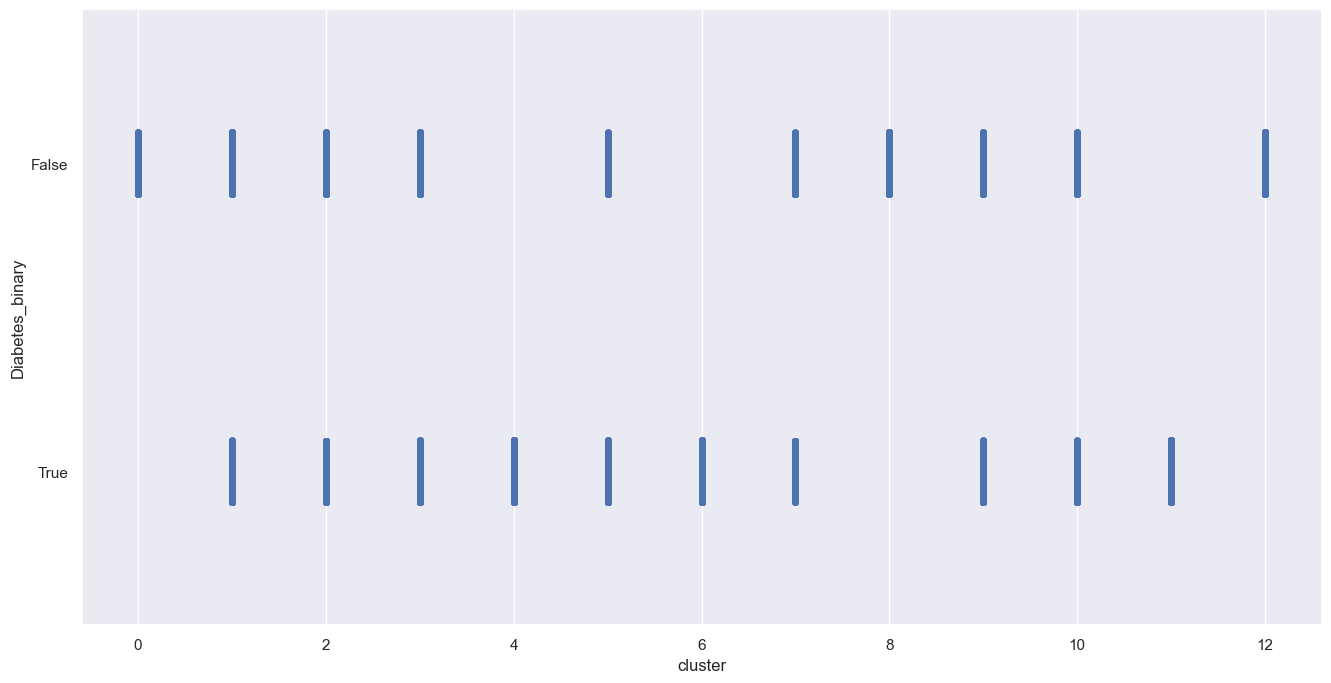

In [80]:
f = plt.figure(figsize=(16,8))
sb.stripplot(x='cluster', y='Diabetes_binary', data = age)

<Axes: xlabel='Age', ylabel='Diabetes_binary'>

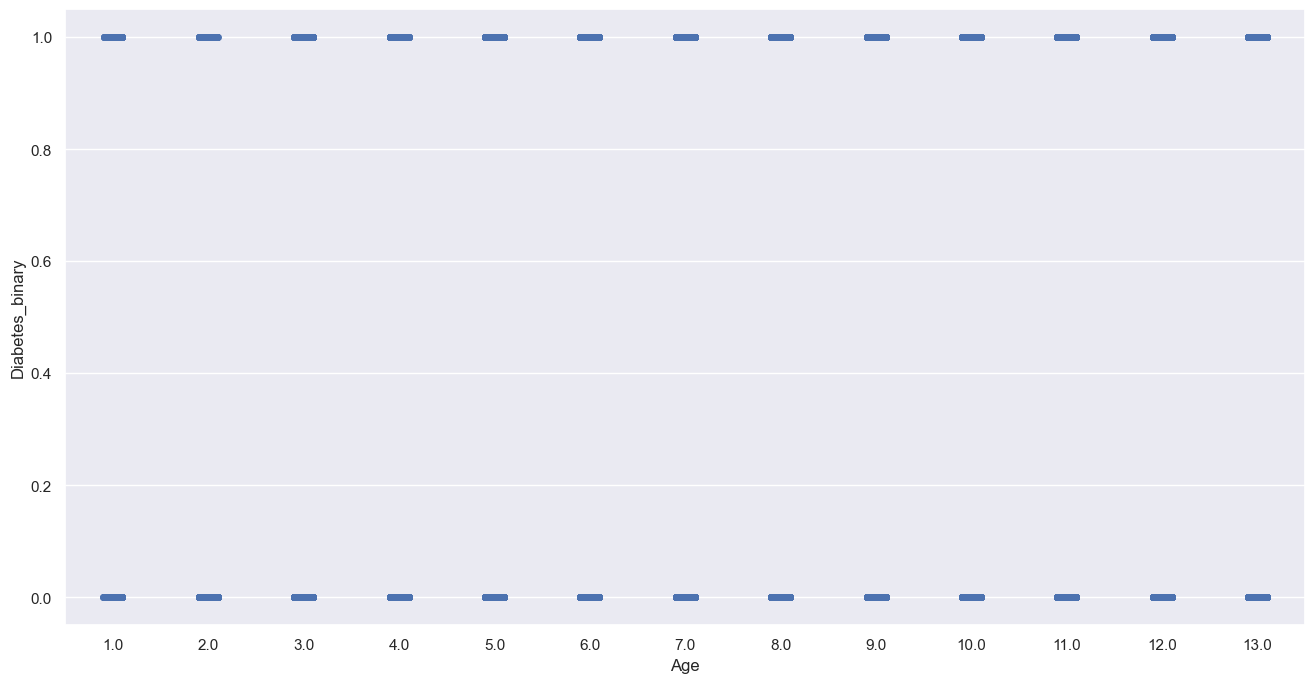

In [62]:
f = plt.figure(figsize=(16,8))
sb.stripplot(x=age.Age, y=age.Diabetes_binary)

<Axes: xlabel='Age', ylabel='Diabetes_binary'>

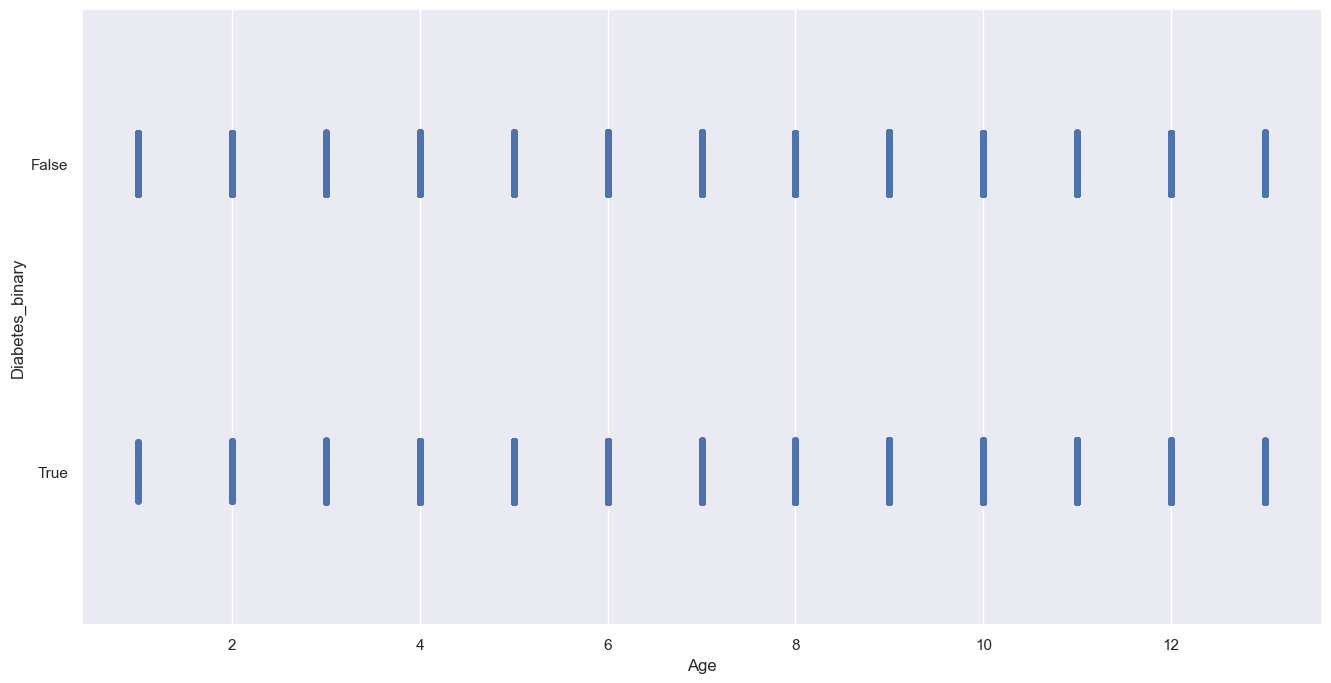

In [83]:
f = plt.figure(figsize=(16,8))
sb.stripplot(x='Age', y='Diabetes_binary', data = age)